In [56]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

###Loading the Dataset

In [57]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

##Exploring dataset

In [58]:
print("Training set shape:", train_images.shape)
print("Number of training samples:", len(train_images))
print("Number of test samples:", len(test_images))
print("Number of classes:", len(set(train_labels)))

Training set shape: (60000, 28, 28)
Number of training samples: 60000
Number of test samples: 10000
Number of classes: 10


###Displaying sample images

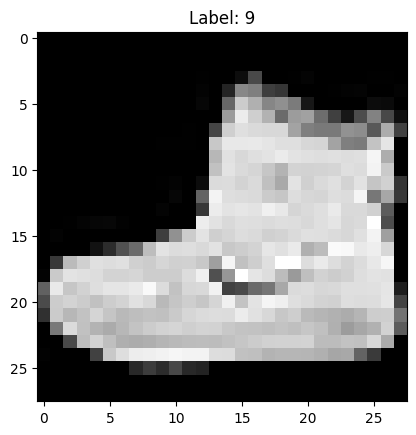

In [59]:

plt.imshow(train_images[0], cmap='gray')
plt.title("Label: {}".format(train_labels[0]))
plt.show()


###Pre processing the dataset
##Q2: Train a dense neural network using Keras

In [60]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

###Building and evaluating the model

In [61]:

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])



history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2,verbose=2)


test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)

print('\nTest accuracy:', test_acc)


Epoch 1/10
750/750 - 4s - loss: 0.1100 - binary_accuracy: 0.9606 - val_loss: 0.0833 - val_binary_accuracy: 0.9689 - 4s/epoch - 6ms/step
Epoch 2/10
750/750 - 3s - loss: 0.0767 - binary_accuracy: 0.9711 - val_loss: 0.0753 - val_binary_accuracy: 0.9706 - 3s/epoch - 4ms/step
Epoch 3/10
750/750 - 3s - loss: 0.0687 - binary_accuracy: 0.9740 - val_loss: 0.0713 - val_binary_accuracy: 0.9724 - 3s/epoch - 4ms/step
Epoch 4/10
750/750 - 3s - loss: 0.0638 - binary_accuracy: 0.9756 - val_loss: 0.0696 - val_binary_accuracy: 0.9736 - 3s/epoch - 4ms/step
Epoch 5/10
750/750 - 2s - loss: 0.0604 - binary_accuracy: 0.9769 - val_loss: 0.0660 - val_binary_accuracy: 0.9747 - 2s/epoch - 3ms/step
Epoch 6/10
750/750 - 2s - loss: 0.0578 - binary_accuracy: 0.9778 - val_loss: 0.0642 - val_binary_accuracy: 0.9746 - 2s/epoch - 3ms/step
Epoch 7/10
750/750 - 3s - loss: 0.0551 - binary_accuracy: 0.9789 - val_loss: 0.0620 - val_binary_accuracy: 0.9765 - 3s/epoch - 3ms/step
Epoch 8/10
750/750 - 3s - loss: 0.0533 - binary_

In [63]:
# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print('Accuracy:', accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print('\nConfusion Matrix:')
print(conf_matrix)



313/313 [==============================] - 1s 2ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

###confusion matrix

In [ ]:
# Display the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

C:\Users\Andy\AppData\Local\Temp\ipykernel_10700\1856602863.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect_indices = np.where(test_labels != predicted_labels)[0]


TypeError: only integer scalar arrays can be converted to a scalar index

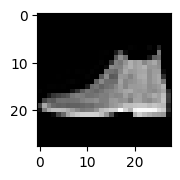

In [ ]:
incorrect_indices = np.where(test_labels != predicted_labels)[0]

# Display some incorrect predictions
plt.figure(figsize=(10, 4))
for i, idx in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title('True: {}\nPredicted: {}'.format(classes[test_labels[idx]], classes[predicted_labels[idx]]))
    plt.axis('off')
plt.show()

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.8776


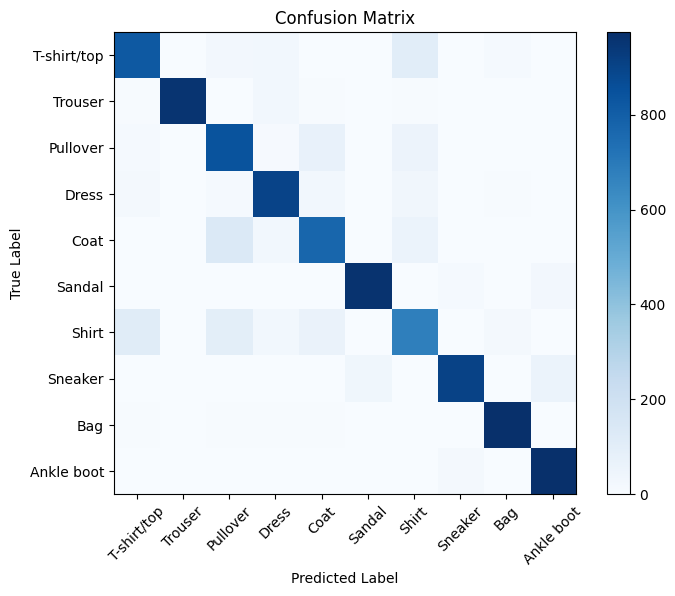

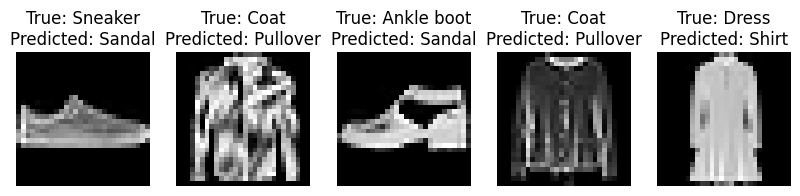